In [15]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from prophet import Prophet

In [16]:
df=pd.read_csv(r"D:\Road to Data Science\DataSets Given In Class\airline_passengers.csv")
df.head()

,Month,Thousands of Passengers
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0


In [17]:
df.tail()

,Month,Thousands of Passengers
140,1960-09,508.0
141,1960-10,461.0
142,1960-11,390.0
143,1960-12,432.0
144,International airline passengers: monthly tota...,NaN


In [18]:
df.drop(144,axis=0,inplace=True)

In [19]:
df.tail()

,Month,Thousands of Passengers
139,1960-08,606.0
140,1960-09,508.0
141,1960-10,461.0
142,1960-11,390.0
143,1960-12,432.0


In [20]:
df.columns=["ds","y"]

In [21]:
df

,ds,y
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0
...,...,...
139,1960-08,606.0
140,1960-09,508.0
141,1960-10,461.0
142,1960-11,390.0


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ds      144 non-null    object 
 1   y       144 non-null    float64
dtypes: float64(1), object(1)
memory usage: 2.4+ KB


In [23]:
df["ds"]=pd.to_datetime(df["ds"])

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      144 non-null    datetime64[ns]
 1   y       144 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 2.4 KB


<AxesSubplot:>

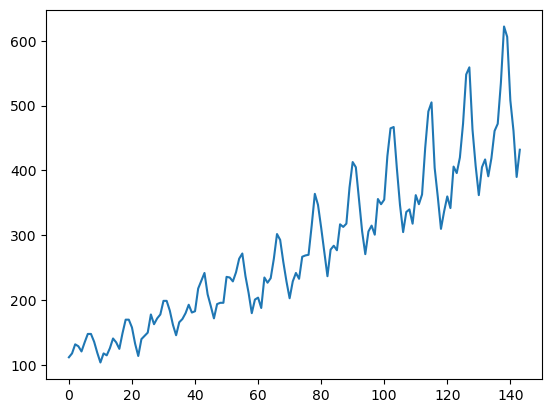

In [25]:
df["y"].plot()

In [26]:
model=Prophet()
model.fit(df)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [27]:
model

In [28]:
model.seasonalities

OrderedDict([('yearly',
              {'period': 365.25,
               'fourier_order': 10,
               'prior_scale': 10.0,
               'mode': 'additive',
               'condition_name': None})])

In [29]:
model.component_modes

{'additive': ['yearly',
  'additive_terms',
  'extra_regressors_additive',
  'holidays'],
 'multiplicative': ['multiplicative_terms', 'extra_regressors_multiplicative']}

In [30]:
dir(Prophet)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_load_stan_backend',
 'add_country_holidays',
 'add_group_component',
 'add_regressor',
 'add_seasonality',
 'construct_holiday_dataframe',
 'fit',
 'flat_growth_init',
 'flat_trend',
 'fourier_series',
 'initialize_scales',
 'linear_growth_init',
 'logistic_growth_init',
 'make_all_seasonality_features',
 'make_future_dataframe',
 'make_holiday_features',
 'make_seasonality_features',
 'parse_seasonality_args',
 'percentile',
 'piecewise_linear',
 'piecewise_logistic',
 'plot',
 'plot_components',
 'predict',
 'predict_seasonal_components',
 'predict_trend',
 'predict_uncertainty',
 'predictive_samples',
 'regressor_col

In [31]:
# creating future dates
future_dates=model.make_future_dataframe(periods=365)
future_dates

,ds
0,1949-01-01
1,1949-02-01
2,1949-03-01
3,1949-04-01
4,1949-05-01
...,...
504,1961-11-27
505,1961-11-28
506,1961-11-29
507,1961-11-30


In [32]:
prediction=model.predict(future_dates)
prediction.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1949-01-01,106.320611,57.309932,112.059287,106.320611,106.320611,-21.941934,-21.941934,-21.941934,-21.941934,-21.941934,-21.941934,0.0,0.0,0.0,84.378677
1,1949-02-01,108.500995,49.001183,106.392415,108.500995,108.500995,-30.714169,-30.714169,-30.714169,-30.714169,-30.714169,-30.714169,0.0,0.0,0.0,77.786826
2,1949-03-01,110.470374,82.205549,139.517584,110.470374,110.470374,-0.475833,-0.475833,-0.475833,-0.475833,-0.475833,-0.475833,0.0,0.0,0.0,109.994541
3,1949-04-01,112.650758,80.657712,135.273018,112.650758,112.650758,-5.203855,-5.203855,-5.203855,-5.203855,-5.203855,-5.203855,0.0,0.0,0.0,107.446903
4,1949-05-01,114.760808,83.989690,139.717643,114.760808,114.760808,-3.825854,-3.825854,-3.825854,-3.825854,-3.825854,-3.825854,0.0,0.0,0.0,110.934953


In [33]:
prediction[["yhat_lower","yhat_upper","yhat"]].tail()

,yhat_lower,yhat_upper,yhat
504,471.466732,523.607064,498.382393
505,468.020261,523.182735,496.856777
506,467.444377,523.471548,494.698423
507,464.495581,518.657382,491.951751
508,459.798658,516.459533,488.676395


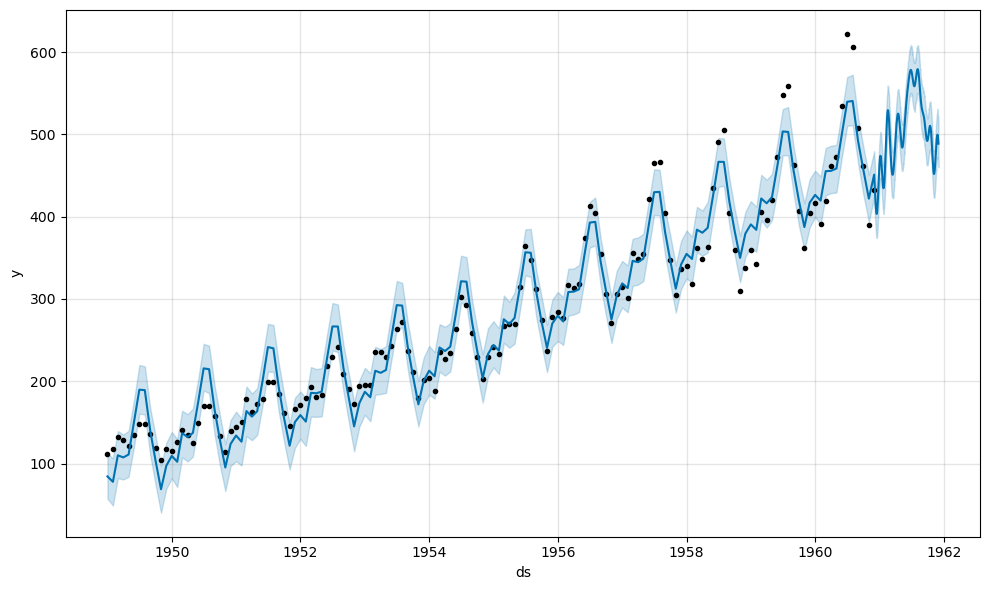

In [35]:
model.plot(prediction);

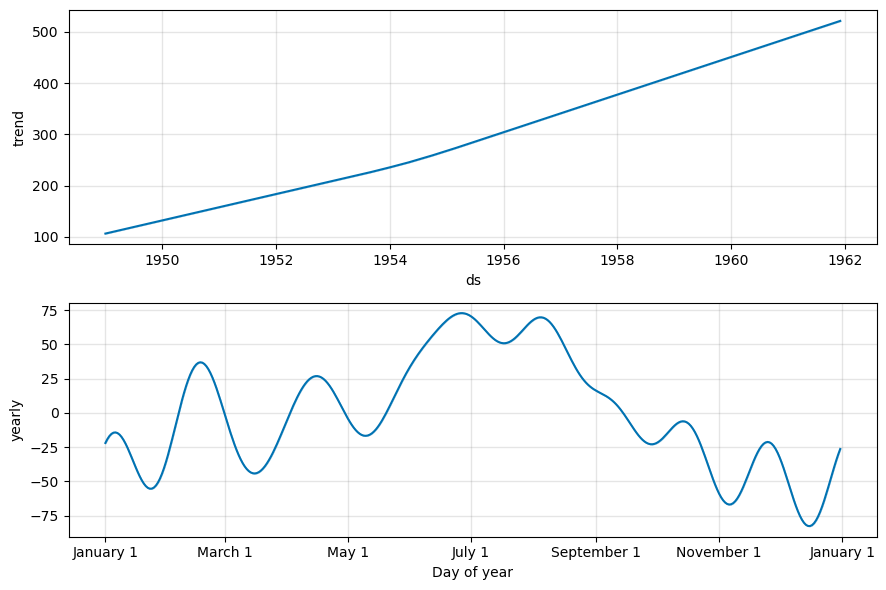

In [37]:
model.plot_components(prediction);

In [39]:
from prophet.diagnostics import cross_validation

df_cv=cross_validation(model,horizon="365 days",period='180 days',initial='1095 days')

INFO:prophet:Making 17 forecasts with cutoffs between 1952-01-13 00:00:00 and 1959-12-02 00:00:00


  0%|          | 0/17 [00:00<?, ?it/s]

In [40]:
df.head()

,ds,y
0,1949-01-01,112.0
1,1949-02-01,118.0
2,1949-03-01,132.0
3,1949-04-01,129.0
4,1949-05-01,121.0


In [41]:
df.tail()

,ds,y
139,1960-08-01,606.0
140,1960-09-01,508.0
141,1960-10-01,461.0
142,1960-11-01,390.0
143,1960-12-01,432.0


In [42]:
df_cv.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,1952-02-01,176.418553,173.167775,179.808473,180.0,1952-01-13
1,1952-03-01,190.922738,187.399729,194.498602,193.0,1952-01-13
2,1952-04-01,199.998322,196.457981,203.447896,181.0,1952-01-13
3,1952-05-01,183.896476,180.362229,187.177227,183.0,1952-01-13
4,1952-06-01,208.184849,204.438103,211.606426,218.0,1952-01-13


In [43]:
df_cv.tail()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
199,1960-08-01,527.079522,502.110838,553.304039,606.0,1959-12-02
200,1960-09-01,485.869209,460.186558,513.396487,508.0,1959-12-02
201,1960-10-01,452.202363,426.957083,476.143885,461.0,1959-12-02
202,1960-11-01,422.372655,396.815017,449.343805,390.0,1959-12-02
203,1960-12-01,447.652267,422.614033,474.515456,432.0,1959-12-02


In [44]:
df.shape

(144, 2)

In [45]:
df_cv.shape

(204, 6)

In [46]:
from prophet.diagnostics import performance_metrics
df_performance=performance_metrics(df_cv)
df_performance.head()

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,40 days,1187.231572,34.456227,27.602410,0.081480,0.085577,0.082738,0.25
1,42 days,1269.690552,35.632717,29.434729,0.085657,0.088366,0.087175,0.20
2,46 days,1164.242832,34.121003,28.296348,0.083534,0.088366,0.084052,0.20
3,47 days,1314.239174,36.252437,31.015815,0.089330,0.091079,0.090214,0.15
4,48 days,1128.461572,33.592582,28.070143,0.082485,0.088366,0.082782,0.20


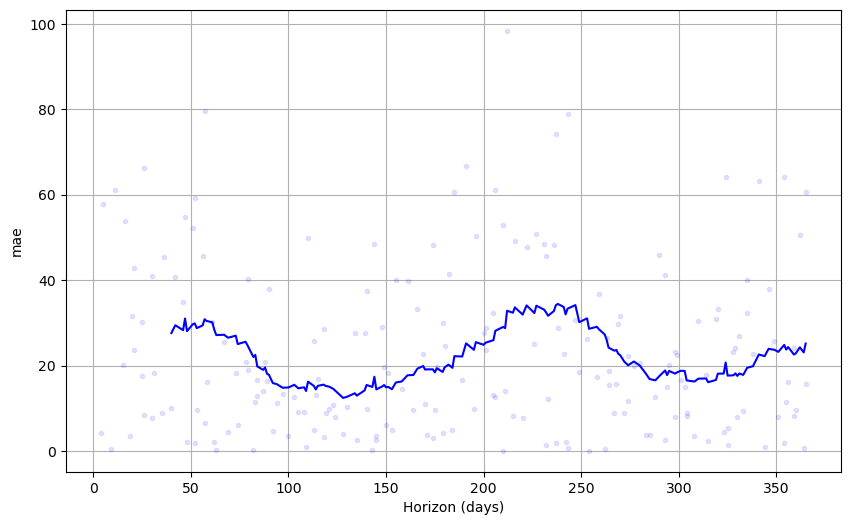

In [49]:
from prophet.plot import plot_cross_validation_metric
fig=plot_cross_validation_metric(df_cv,metric='mae')